In [1]:
import nibabel as nib

In [2]:
nii = nib.load('/Users/aditya/Documents/GitHub/prf-mapping/temp/December 2023/Output/JC/prf_css.nii.gz')

In [3]:
nii

In [4]:
nii_data = nii.get_fdata()

In [5]:
nii_data.shape

(128, 128, 128, 8)

In [6]:
vista_res = nib.load('/Users/aditya/Documents/GitHub/prf-mapping/temp/December 2023/Vista/original_jc_fit/RF_ss5-fFit.nii.gz')

In [7]:
vista_res

In [8]:
vista_res_data = vista_res.get_fdata()

In [9]:
vista_res_data.shape

(128, 128, 128, 8)

In [11]:
print(nii.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 48
dim             : [  4 128 128 128   8   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.  2.  2.  2.  1.3 1.  1.  1. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 127
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 1.0
qoffset_x       : 127.49991
qoffset_y       : 126.50009
qoffset_z       : -126.5
srow_x          : [ -2.    

In [12]:
print(vista_res.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 48
dim             : [  4 128 128 128   8   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.  2.  2.  2.  1.3 0.  0.  0. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 127
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 1.0
qoffset_x       : 127.4999
qoffset_y       : 126.5001
qoffset_z       : -126.5
srow_x          : [ -2.      

In [10]:
type(vista_res_data)

numpy.ndarray

In [11]:
import numpy as np

equal_elements = np.array_equal(nii_data, vista_res_data)
equal_elements

False

In [12]:
mean_difference = np.mean(nii_data) - np.mean(vista_res_data)
std_difference = np.std(nii_data) - np.std(vista_res_data)
print("Mean Difference: ", mean_difference)
print("Standard Difference: ", std_difference)

Mean Difference:  -0.2044418272796127
Standard Difference:  0.6738207638134068


In [13]:
difference_array = nii_data - vista_res_data


In [14]:
norm_difference = np.linalg.norm(nii_data - vista_res_data)
print(norm_difference)

12362.95877623359


In [15]:
correlation_matrix = np.corrcoef(nii_data.flatten(), vista_res_data.flatten())
print(correlation_matrix)

[[1.         0.13109136]
 [0.13109136 1.        ]]


In [16]:
!pip install nilearn

DEPRECATION: Loading egg at /Users/aditya/Documents/GitHub/prf-mapping/myenv/lib/python3.11/site-packages/llvmlite-0.41.1-py3.11-macosx-13.2-arm64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /Users/aditya/Documents/GitHub/prf-mapping/myenv/lib/python3.11/site-packages/numba-0.58.1-py3.11-macosx-13.2-arm64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /Users/aditya/Documents/GitHub/prf-mapping/myenv/lib/python3.11/site-packages/popeye-0.5.2-py3.11-macosx-13.2-arm64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com

In [17]:
import nilearn

In [18]:
from nilearn import plotting

In [20]:
from nilearn import image

In [21]:
print(image.load_img(nii).shape)

(128, 128, 128, 8)


/Users/aditya/Documents/GitHub/prf-mapping/myenv/lib/python3.11/site-packages/nilearn/plotting/displays/_slicers.py:438: UserWarning: empty mask
  xmin_, xmax_, ymin_, ymax_, zmin_, zmax_ = get_mask_bounds(


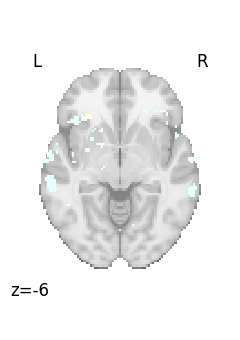

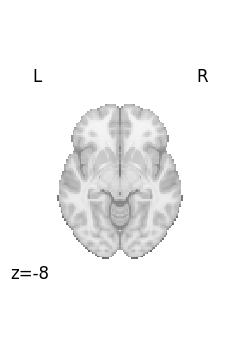

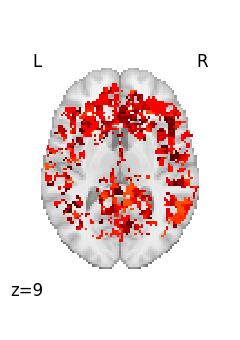

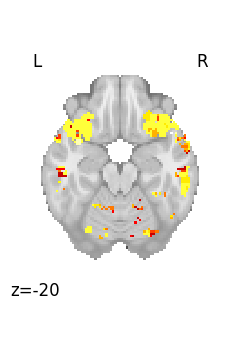

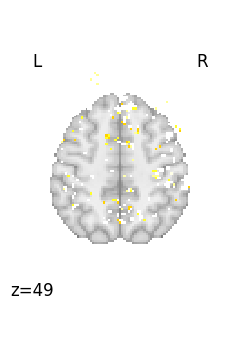

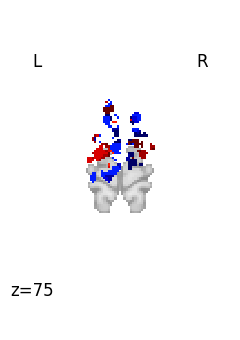

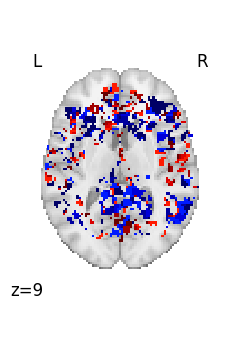

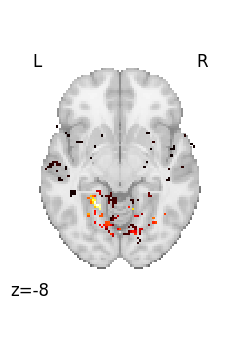

In [23]:
for img in image.iter_img(nii):
    # img is now an in-memory 3D img
    plotting.plot_stat_map(
        img, threshold=3, display_mode="z", cut_coords=1, colorbar=False
    )

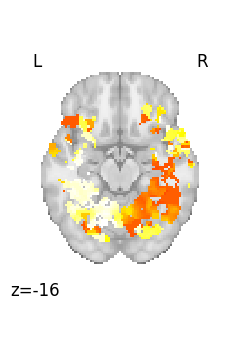

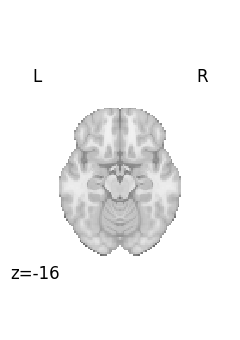

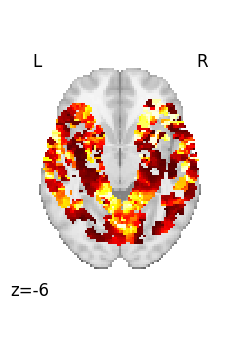

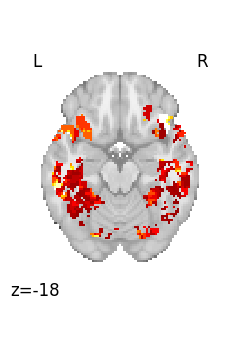

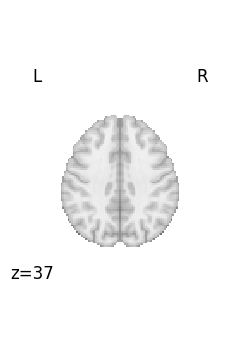

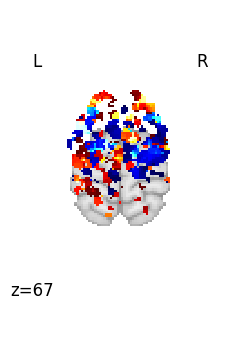

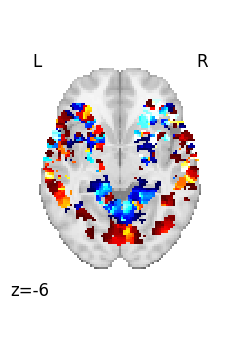

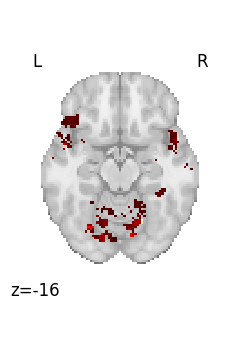

In [24]:
for img in image.iter_img(vista_res):
    # img is now an in-memory 3D img
    plotting.plot_stat_map(
        img, threshold=3, display_mode="z", cut_coords=1, colorbar=False
    )

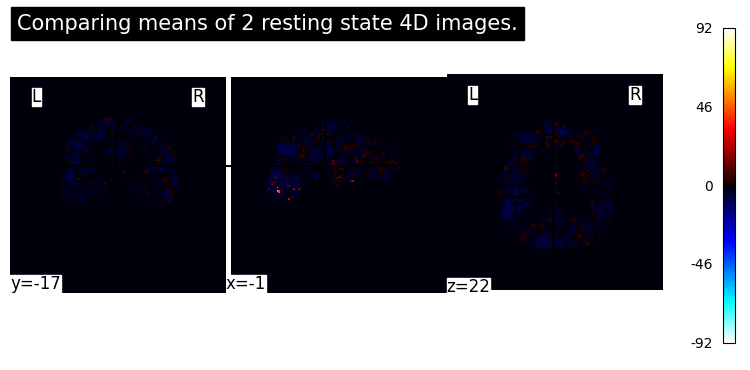

In [25]:
from nilearn import image, plotting

result_img = image.math_img(
    "np.mean(img1, axis=-1) - np.mean(img2, axis=-1)",
    img1=nii,
    img2=vista_res,
)

plotting.plot_stat_map(
    result_img, title="Comparing means of 2 resting state 4D images."
)
plotting.show()

/Users/aditya/Documents/GitHub/prf-mapping/myenv/lib/python3.11/site-packages/nilearn/plotting/find_cuts.py:66: UserWarning: Given img is empty. Returning default cut_coords=(0.0, 0.0, 0.0) instead.
  warnings.warn(


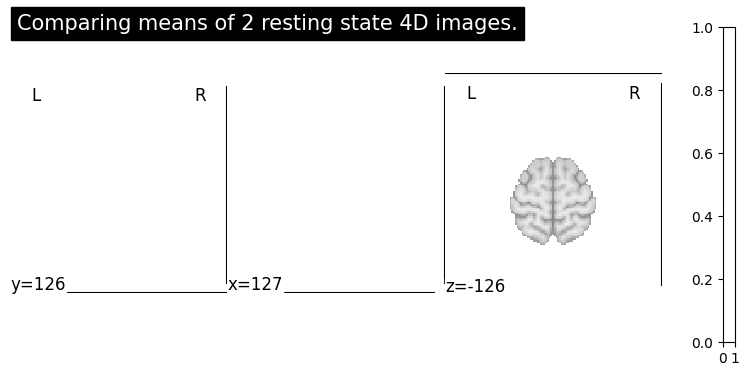

In [26]:
from nilearn import image, plotting

result_img = image.math_img(
    "np.mean(img1, axis=-1) - np.mean(img2, axis=-1)",
    img1=nii,
    img2=nii,
)

plotting.plot_stat_map(
    result_img, title="Comparing means of 2 resting state 4D images."
)
plotting.show()

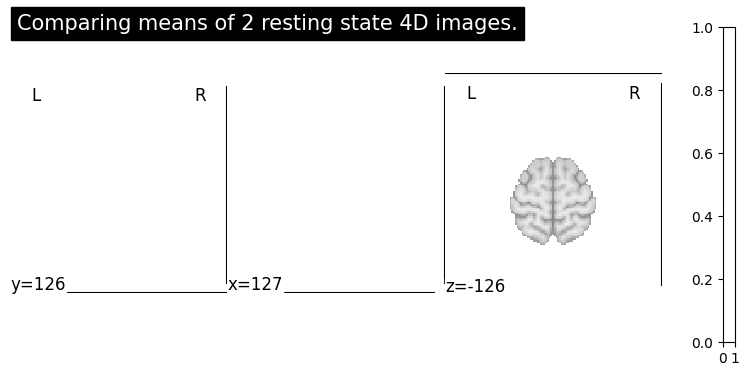

In [27]:
from nilearn import image, plotting

result_img = image.math_img(
    "np.mean(img1, axis=-1) - np.mean(img2, axis=-1)",
    img1=vista_res,
    img2=vista_res,
)

plotting.plot_stat_map(
    result_img, title="Comparing means of 2 resting state 4D images."
)
plotting.show()

In [28]:
nii.shape

(128, 128, 128, 8)

In [29]:
vista_res.shape

(128, 128, 128, 8)